# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_displacement_model

# View the docstrings

In [3]:
help(run_displacement_model)

Help on module run_displacement_model:

NAME
    run_displacement_model

DESCRIPTION
    This file runs the KEA23 displacement model.
    - The results are returned in a pandas DataFrame.
    - Results for the location, its complement, and folded location are always returned.
    - The mean model (i.e., mean coefficients) is run by default, but results for all coefficients can be computed.
    - If full model is run (i.e., `mean_model=False`), then only one scenario is allowed.
    - A scenario is defined as a magnitude-location-percentile combination.
    - If mean model is run (i.e., `mean_model=True` or default), then any number of scenarios is allowed.
    - Only one style of faulting is allowed regardless of whether mean or full coefficients are used.
    - Command-line use is supported; try `python run_displacement_model.py --help`
    - Module use is supported; try `from run_displacement_model import run_model`
    
    # NOTE: Several helper functions are defined herein, but th

# Run displacement model

## Single scenarios

A single scenario is defined as a magnitude/location/percentile/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
mag, loc, sof, perc = 6.8, 0.25, "strike-slip", 0.5

results = run_displacement_model.run_model(
    magnitude=mag, location=loc, style=sof, percentile=perc
)

results

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.25,strike-slip,0.5,-1,0.161181,-0.165984,0.838578,-0.446925,0.879506,-0.165984,-0.446925,-0.306454,0.845147,0.628865,0.730313


The default is to use the mean model coefficients, as shown above. The full model coefficients can be obtained by setting `mean_model=False`). Here is an example.

In [5]:
results = run_displacement_model.run_model(
    magnitude=mag, location=loc, style=sof, percentile=perc, mean_model=False
)

results

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.25,strike-slip,0.5,1,0.153139,-0.317954,0.975245,-0.591263,1.006839,-0.317954,-0.591263,-0.454608,0.721837,0.538071,0.624248
1,6.8,0.25,strike-slip,0.5,2,0.167483,-0.345046,0.803322,-0.629654,0.850045,-0.345046,-0.629654,-0.487350,0.700881,0.514073,0.601461
2,6.8,0.25,strike-slip,0.5,3,0.157091,-0.278330,0.834972,-0.561723,0.883778,-0.278330,-0.561723,-0.420026,0.752317,0.555399,0.647572
3,6.8,0.25,strike-slip,0.5,4,0.170254,-0.300707,0.826258,-0.566434,0.864017,-0.300707,-0.566434,-0.433571,0.734417,0.551210,0.637369
4,6.8,0.25,strike-slip,0.5,5,0.164652,-0.144050,0.857047,-0.444179,0.891611,-0.144050,-0.444179,-0.294114,0.864343,0.630489,0.739727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6.8,0.25,strike-slip,0.5,496,0.164615,-0.129185,0.801826,-0.395689,0.834986,-0.129185,-0.395689,-0.262437,0.877588,0.664205,0.764698
496,6.8,0.25,strike-slip,0.5,497,0.168537,-0.192166,0.829537,-0.542323,0.877871,-0.192166,-0.542323,-0.367245,0.822549,0.566245,0.684476
497,6.8,0.25,strike-slip,0.5,498,0.162213,-0.269770,0.822091,-0.528172,0.853175,-0.269770,-0.528172,-0.398971,0.758927,0.575694,0.662015
498,6.8,0.25,strike-slip,0.5,499,0.164793,-0.088728,0.747938,-0.397365,0.804082,-0.088728,-0.397365,-0.243047,0.914495,0.663005,0.780322


## Multiple scenarios

When the mean model coefficients are used, multiple magnitude/location/percentile scenarios can be run. All combinations of magnitudes, locations, and percentiles are run. However, only one style of faulting is permitted. Here is an example.

In [6]:
mags, locs, percs, sof = (
    [6.8],
    [0.25, 0.5],
    [0.5, -1],
    "strike-slip",
)

results = run_displacement_model.run_model(
    magnitude=mags, location=locs, style=sof, percentile=percs, mean_model=True
)

results

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,6.8,0.25,strike-slip,0.5,-1,0.161181,-0.165984,0.838578,-0.446925,0.879506,-0.165984,-0.446925,-0.306454,0.845147,0.628865,0.730313
1,6.8,0.25,strike-slip,-1.0,-1,0.161181,-0.165984,0.838578,-0.446925,0.879506,0.103687,-0.142453,-0.019383,1.108303,0.865790,0.980774
2,6.8,0.50,strike-slip,0.5,-1,0.161181,0.090865,0.810565,0.090865,0.810565,0.090865,0.090865,0.090865,1.094400,1.094400,1.094400
3,6.8,0.50,strike-slip,-1.0,-1,0.161181,0.090865,0.810565,0.090865,0.810565,0.336171,0.336171,0.336171,1.387328,1.387328,1.387328


Note that multiple scenarios *cannot* be run when the full model coefficients are used (i.e., `mean_model=False`):

In [7]:
try:
    results = run_displacement_model.run_model(
        magnitude=mags, location=locs, style=sof, percentile=percs, mean_model=False
    )
except TypeError as e:
    print(e)

Only one value is allowed for 'location' when `mean_model=False`, but user entered '[0.25, 0.5]', which is 2 values.


In [8]:
del mags, locs, percs, sof

And note that multiple styles also cannot be run, regardless of whether mean or full model coefficients are used:

In [9]:
try:
    results = run_displacement_model.run_model(
        magnitude=7, location=0.2, style=["normal", "reverse"], percentile=0.5, mean_model=True
    )
except TypeError as e:
    print(e)

Expected a string, got '['normal', 'reverse']', which is a list.(In other words, only one value is allowed; check you have not entered a list or array.)


In [10]:
try:
    results = run_displacement_model.run_model(
        magnitude=7, location=0.2, style=["normal", "reverse"], percentile=0.5, mean_model=False
    )
except TypeError as e:
    print(e)

Expected a string, got '['normal', 'reverse']', which is a list.(In other words, only one value is allowed; check you have not entered a list or array.)


# Calculate slip profile

There is a separate convenient function that does this, but here is a proof-of-concept. We can use `percentile=-1` to obtain the mean prediction, and then the area under the mean slip profile is equivalent to the *Average Displacement (AD)* that is implied by the model (for that magnitude).

In [11]:
mag = 7
locs = np.arange(0, 1.01, 0.01)
perc = -1
sof = "normal"

df = run_displacement_model.run_model(
    magnitude=mag, location=locs, style=sof, percentile=perc
)

df

,magnitude,location,style,percentile,model_number,lambda,mu_site,sigma_site,mu_complement,sigma_complement,Y_site,Y_complement,Y_folded,displ_site,displ_complement,displ_folded
0,7.0,0.00,normal,-1.0,-1,0.119203,-1.482956,0.881918,-1.482956,0.881918,-1.137844,-1.137844,-1.137844,0.294409,0.294409,0.294409
1,7.0,0.01,normal,-1.0,-1,0.119203,-0.404452,0.881918,-1.437972,0.881918,-0.093289,-1.094388,-0.593838,0.910455,0.309543,0.540152
2,7.0,0.02,normal,-1.0,-1,0.119203,-0.173639,0.881918,-1.394147,0.881918,0.130948,-1.052041,-0.460546,1.138757,0.324945,0.622712
3,7.0,0.03,normal,-1.0,-1,0.119203,-0.022583,0.881918,-1.350916,0.881918,0.277824,-1.010259,-0.366218,1.314324,0.340799,0.687666
4,7.0,0.04,normal,-1.0,-1,0.119203,0.090256,0.881918,-1.308164,0.881918,0.387603,-0.968931,-0.290664,1.460699,0.357147,0.743922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7.0,0.96,normal,-1.0,-1,0.119203,-1.308164,0.881918,0.090256,0.881918,-0.968931,0.387603,-0.290664,0.357147,1.460699,0.743922
97,7.0,0.97,normal,-1.0,-1,0.119203,-1.350916,0.881918,-0.022583,0.881918,-1.010259,0.277824,-0.366218,0.340799,1.314324,0.687666
98,7.0,0.98,normal,-1.0,-1,0.119203,-1.394147,0.881918,-0.173639,0.881918,-1.052041,0.130948,-0.460546,0.324945,1.138757,0.622712
99,7.0,0.99,normal,-1.0,-1,0.119203,-1.437972,0.881918,-0.404452,0.881918,-1.094388,-0.093289,-0.593838,0.309543,0.910455,0.540152


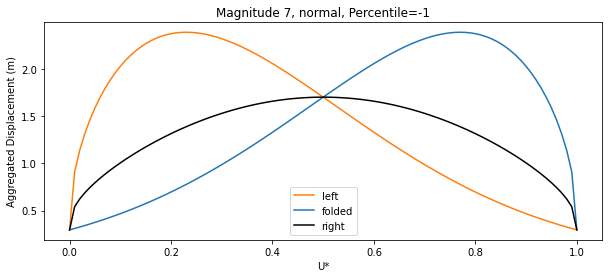

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, d_left, d_right, d_folded = (
    df["location"],
    df["displ_site"],
    df["displ_complement"],
    df["displ_folded"],
)
ax.plot(x, d_left, c="tab:orange", label="left")
ax.plot(x, d_right, c="tab:blue", label="folded")
ax.plot(x, d_folded, c="k", label="right")
title = f"Magnitude {mag}, {sof}, Percentile={perc}"
ax.set(xlabel="U*", ylabel="Aggregated Displacement (m)", title=title)
ax.legend(loc="best");

In [13]:
for profile in [d_folded, d_left, d_right]:
    print(max(profile))

1.701909595741398
2.3900487353871953
2.3900487353871953


In [14]:
for profile in [d_folded, d_left, d_right]:
    print(np.trapz(profile, x))

1.3306332339744842
1.4651614248271465
1.4651614248271467
